In [21]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
input_file = 'AirQualityUCI_refined.csv'
df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\uhico\AppData\Local\Temp\ipykernel_8552\1731237121.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

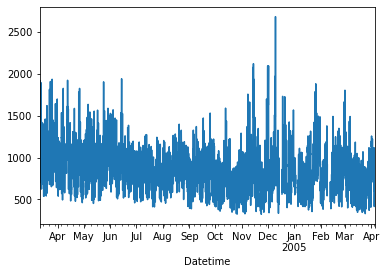

In [32]:
df['PT08.S3(NOx)'].plot()

In [34]:
nox = df["PT08.S3(NOx)"].interpolate().copy()

In [37]:
"""
IQR-based Outlier Detection
"""
y = nox.quantile(0.25) 
median = nox.quantile(0.5) 
z = nox.quantile(0.75)

In [38]:
x = z - y
high = z + 1.5 * x
low= y - 1.5 * x
print(high, lower)

1439.0 -249.0


In [39]:
# iqr 기반 이상치 탐지
outliers = nox.loc[(high < nox) | (nox < low)]
outliers

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64

C:\Users\uhico\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

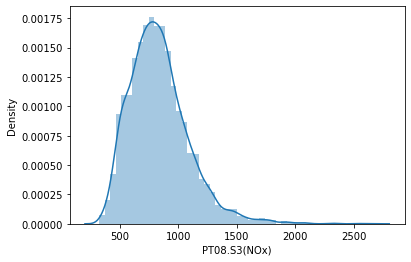

In [40]:
"""
Detecting Outliers with Z-Scores
"""

import seaborn as sns

sns.distplot(nox)

In [41]:
mean = np.mean(nox)
std = np.std(nox)
print(mean, std)

832.7588970823982 255.69616900657363


In [42]:
outliers = []
k = 3

for i in nox:
    z_score = (i - mean) / std
    if (np.abs(z_score) > k):
        outliers.append(i)
print(outliers)

[1705.0, 1818.0, 1918.0, 1738.0, 1680.0, 1893.0, 1895.0, 1685.0, 1620.0, 1813.0, 1756.0, 1786.0, 1701.0, 1908.0, 1707.0, 1935.0, 1604.0, 1643.0, 1613.0, 1699.0, 1749.0, 1826.0, 1705.0, 1615.0, 1822.0, 1923.0, 1756.0, 1613.0, 1783.0, 1718.0, 1722.0, 1826.0, 1635.0, 1625.0, 1807.0, 1904.0, 1803.0, 1795.0, 1941.0, 1917.0, 1703.0, 1757.0, 1665.0, 1601.0, 1663.0, 1643.0, 1771.0, 2077.0, 2062.0, 1964.0, 1793.0, 1664.0, 1716.0, 2121.0, 1991.0, 1773.0, 1798.0, 1678.0, 1938.0, 1666.0, 1750.0, 1768.0, 1775.0, 1699.0, 1900.0, 1955.0, 2042.0, 2061.0, 2095.0, 2009.0, 1699.0, 1732.0, 1705.0, 1648.0, 1627.0, 1812.0, 1789.0, 1930.0, 2047.0, 2095.0, 1667.0, 1972.0, 1729.0, 1613.0, 2081.0, 2331.0, 2559.0, 2294.0, 2683.0, 2327.0, 2318.0, 2542.0, 1731.0, 1653.0, 1726.0, 1705.0, 1651.0, 1696.0, 1785.0, 1745.0, 1622.0, 1775.0, 1881.0, 1646.0, 1609.0, 1664.0, 1665.0, 1791.0, 1804.0, 1727.0, 1677.0]
